<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Cargamos-el-dataset-y-lo-divimos-en-80/20" data-toc-modified-id="Cargamos-el-dataset-y-lo-divimos-en-80/20-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Cargamos el dataset y lo divimos en 80/20</a></span></li><li><span><a href="#Definimos-el-modelo-y-entrenamos-con-los-datos-de-Train" data-toc-modified-id="Definimos-el-modelo-y-entrenamos-con-los-datos-de-Train-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Definimos el modelo y entrenamos con los datos de Train</a></span></li><li><span><a href="#Predecimos" data-toc-modified-id="Predecimos-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Predecimos</a></span></li><li><span><a href="#Veamos-el-reporte-de-resultados-(esta-matriz-de-datos-se-detalla-más-adelante)" data-toc-modified-id="Veamos-el-reporte-de-resultados-(esta-matriz-de-datos-se-detalla-más-adelante)-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Veamos el reporte de resultados (esta matriz de datos se detalla más adelante)</a></span></li></ul></li><li><span><a href="#Mejorando-el-modelo" data-toc-modified-id="Mejorando-el-modelo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mejorando el modelo</a></span></li><li><span><a href="#Técnicas-de-Validación-Cruzada-(cross-validation)" data-toc-modified-id="Técnicas-de-Validación-Cruzada-(cross-validation)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Técnicas de Validación Cruzada (cross-validation)</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation:-K-fold-con-5-splits" data-toc-modified-id="Cross-Validation:-K-fold-con-5-splits-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cross-Validation: K-fold con 5 splits</a></span></li><li><span><a href="#Ejemplo-de-K-Folds-en-Python-donde-vamos-a-realizar:" data-toc-modified-id="Ejemplo-de-K-Folds-en-Python-donde-vamos-a-realizar:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ejemplo de K-Folds en Python donde vamos a realizar:</a></span></li></ul></li></ul></div>

# Conjuntos de entrenamiento, test y validación

Lo ideal es tener nuestro conjunto de datos dividido, pero esto no es así en la mayoría de casos. Digamos que tenemos un archivo csv con 10.000 registros.

Para entrenar nuestro modelo de Machine Learning y poder saber si está funcionando bien, separemos el conjunto de datos inicial en 2: 
* __Conjunto de entrenamiento (train).__ 
* __Conjunto de pruebas (test).__

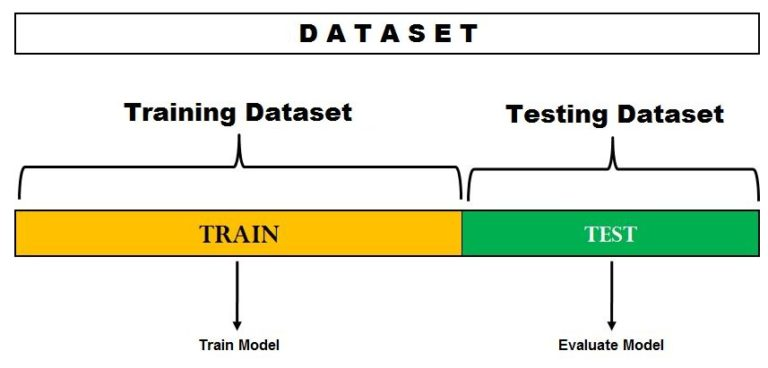

Por lo general se divide haciendo "80-20". Y se toman muestras aleatorias -no en secuencia, si no, mezclado.

Para hacer el ejemplo sencillo, supongamos que queremos hacer clasificación usando un algoritmo supervisado, con lo cual tendremos:

* __X_train__ con 8.000 registros para entrenar
* __y_train__ con las "etiquetas" de los resultados esperados de X_train
* __X_test__ con 2.000 registros para test
* __y_test__ con las "etiquetas" de los resultados de X_test

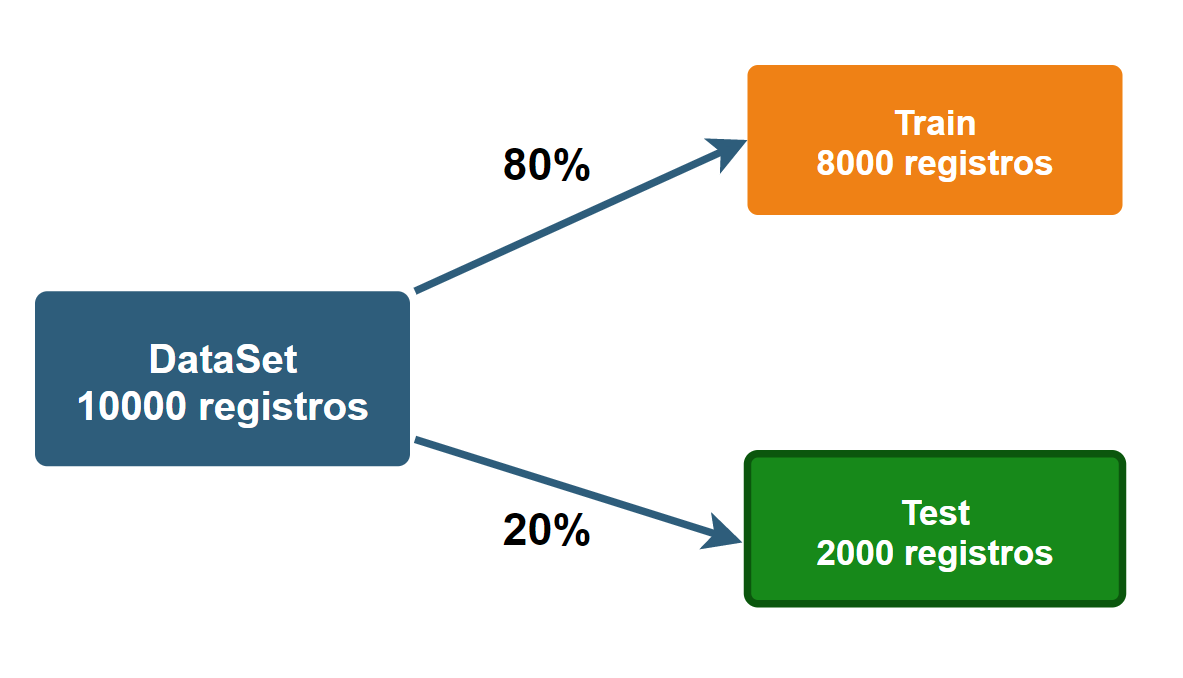

El primer paso es realizar esta división, para ello utilizaremos el método __<code>train_test_split</code>__ que nos permite fácilmente dividir un conjunto de datos de una matriz o DataFrame en dos aleatorios con un tamaño dado. Una función que se puede llamar de la siguiente manera:

<code>X_train, X_test, y_train, y_test = train_test_split(X, y)</code>

Se han pasado como parámetros a la función las variables "X" e "y" las cuales representan los datos y las etiquetas de los mismos. Como resultado se obtiene un conjunto de datos para entrenamiento (X_train e y_train) y otro para test (X_test e y_test). En este caso, por defecto, el 75% de todos los registros estarán en el conjunto de entrenamiento y el 25 restante en el de test.

La función admite diferentes propiedades interesantes con las adaptar el funcionamiento del método, entre las que se puede destacar:

* <code>test_size</code>: el tamaño del conjunto de datos que se asigna para test que tiene que ser un valor entre 0 y 1. Una opción complementaria a esta es train_size la que se puede usar en lugar de esta para indicar el tamaño del conjunto de entrenamiento. Usar una u otra es solamente una cuestión de preferencia personal.
* <code>random_state</code>: un entero con el que se indica la semilla utilizada para la selección de datos. Parámetro que es clave cuando necesitamos que los resultados sean repetibles, por lo que es aconsejable usarlos siempre.
* <code>stratify</code>: una variable con la que se puede indicar como hacer una estratificación de los datos.

Lo interesante y a destacar de esto es que una vez los separamos en 8.000 registros para entrenar (train) y 2.000 para probar (test), usaremos sólo esos 8.000 registros para alimentar al modelo al entrenarlo haciendo:

<code>modelo.fit(X_train, y_train)</code>

Después de entrenar nuestro modelo y habiendo decidido como métrica de negocio el Accuracy (el % de aciertos. Luego veremos si esta metrica es la más adecuada) imaginemos que obtenemos un 75% sobre el set de entrenamiento (y asumimos que ese porcentaje nos sirve para nuestro objetivo de negocio).

Los 2.000 registros que separamos en X_test aún nunca han pasado por el modelo de ML. Lo utilizaremos ahora:

<code>modelo.predict(X_test)</code>

Como verás, no estamos usando <code>fit()</code>, sólo pasaremos los datos sin la columna de "y_test" que contiene las etiquetas (la solución). Además remarco que estamos haciendo predicción; me refiero a que el modelo NO se está entrenando ni "incorporando conocimiento". El modelo se limita a "ver la entrada y mostrar una salida".

Cuando hacemos el <code>predict()</code> sobre el conjunto de test y obtenemos las predicciones, las podemos comprobar y contrastar con los valores reales almacenados en y_test y hallar así la métrica que usamos. Los resultados que nos puede dar serán:

* Si el accuracy en Test es cercano al de Entrenamiento (dijimos 75%) por ejemplo en este caso si estuviera entre 65 ú 85% quiere decir que nuestro modelo entrenado está generalizando bien y lo podemos dar por bueno (siempre y cuando estemos conformes con las métricas obtenidas).
* Si el Accuracy en Test es muy distinto al de Entrenamiento tanto por encima como por debajo, nos da un 99% ó un 25% (lejano al 75%) entonces es un indicador de que nuestro modelo no ha entrenado bien y no nos sirve. De hecho este podría ser un indicador de Overfitting o sobre ajuste.

Para evaluar mejor el segundo caso, es donde aparece el __"Conjunto de Validación"__.

Veamos un ejemplo:

#### Cargamos el dataset y lo divimos en 80/20

In [5]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Cargamos un dataset de ejemplo que nos proporciona sciktlearn
iris = datasets.load_iris()
print("Dataset iris cargado. Número de registros: {}".format(len(iris['data'])))

# Algo de información para conocer el dataset
'''
print('The data matrix:\n',iris['data'])
print('The classification target:\n',iris['target'])
print('The names of the dataset columns:\n',iris['feature_names'])
print('The names of target classes:\n',iris['target_names'])
print('The full description of the dataset:\n',iris['DESCR'])
print('The path to the location of the data:\n',iris['filename'])
'''

# Dividimos en un 20% para test y 80% para train
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    test_size=0.2, # train_size = 0.8
                                                    random_state=50)
print("Hay {} registros en el set de train y {} registros en el set de test".format(
X_train.shape[0], X_test.shape[0]))

Dataset iris cargado. Número de registros: 150
Hay 120 registros en el set de train y 30 registros en el set de test


#### Definimos el modelo y entrenamos con los datos de Train

In [6]:
# Definimos el modelo, en este caso un modelo muy basico de regresión logisitca
model = LogisticRegression(max_iter=200)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Comprobamos las metricas tras el entrenamiento
print("Train Accuracy: {:.3f}".format(model.score(X_train, y_train)))
print("Test Accuracy (pre-predicción): {:.3f}".format(model.score(X_test, y_test)))

Train Accuracy: 0.975
Test Accuracy (pre-predicción): 0.967


#### Predecimos

In [7]:
preds = model.predict(X_test)
print("Predicción del modelo: ", preds)
print("La solución real:      ", y_test)
print(X_test)
score_pred = metrics.accuracy_score(y_test, preds)
print("Test Accuracy (post-predicción): {:.3f}".format(score_pred))

Predicción del modelo:  [1 1 0 0 2 2 2 0 0 1 0 2 0 2 1 0 1 0 1 2 2 1 0 2 1 2 1 1 1 2]
La solución real:       [1 1 0 0 2 2 2 0 0 1 0 2 0 2 1 0 1 0 1 1 2 1 0 2 1 2 1 1 1 2]
[[5.6 3.  4.1 1.3]
 [6.3 2.5 4.9 1.5]
 [5.4 3.4 1.7 0.2]
 [5.4 3.9 1.3 0.4]
 [6.5 3.  5.2 2. ]
 [6.7 3.1 5.6 2.4]
 [5.7 2.5 5.  2. ]
 [5.1 3.3 1.7 0.5]
 [4.8 3.  1.4 0.1]
 [6.2 2.2 4.5 1.5]
 [5.1 3.4 1.5 0.2]
 [7.4 2.8 6.1 1.9]
 [4.9 3.1 1.5 0.2]
 [6.8 3.  5.5 2.1]
 [5.7 2.8 4.5 1.3]
 [5.  3.  1.6 0.2]
 [5.8 2.7 3.9 1.2]
 [5.3 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.7 3.  5.  1.7]
 [6.3 3.3 6.  2.5]
 [5.5 2.4 3.8 1.1]
 [5.8 4.  1.2 0.2]
 [7.9 3.8 6.4 2. ]
 [6.7 3.1 4.7 1.5]
 [7.7 2.6 6.9 2.3]
 [6.3 3.3 4.7 1.6]
 [6.5 2.8 4.6 1.5]
 [6.2 2.9 4.3 1.3]
 [6.8 3.2 5.9 2.3]]
Test Accuracy (post-predicción): 0.967


#### Veamos el reporte de resultados (esta matriz de datos se detalla más adelante)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Se puede ver que la metrica de accuracy del set de test pre-predicción y post-predicción están muy cerca (en este caso son iguales 0.97), lo que indica que evitamos un ajuste excesivo. Debo mencionar que esta es una buena indicación de que no hemos sobreajustado el modelo, sin embargo, no es el final del todo. A continuación, analizaremos otro método para evitar el ajuste excesivo de nuestros datos y, con suerte, mejoraremos nuestra capacidad para generalizar sobre nuevos datos.

### Mejorando el modelo
Si el conjunto de Train y Test nos está dando métricas muy distintas esto es que el modelo no nos sirve.

Para mejorar el modelo, podemos pensar en "Tunear" sus parámetros y volver a entrenar y probar, podemos intentar obtener más registros, cambiar el preprocesado de datos, limpieza, balanceo de clases, selección de features, generación de features… De hecho, podemos pensar que seleccionamos un mal modelo, y podemos intentar con distintos modelos: de árbol de decisión, redes neuronales, ensambles…

__La técnica de Validación Cruzada nos ayudará a medir el comportamiento del/los modelos que creamos y nos ayudará a encontrar un mejor modelo rápidamente.__

Aclaremos antes de empezar: hasta ahora contamos con 2 conjuntos: el de Train y Test. El "set de validación" no es realmente un tercer set si no que "vive" dentro del conjunto de Train. Reitero: el set de validación no es un conjunto que apartemos de nuestro archivo csv original. El set de validación se utilizará durante iteraciones que haremos con el conjunto de entrenamiento.

Un ejemplo a continuación:

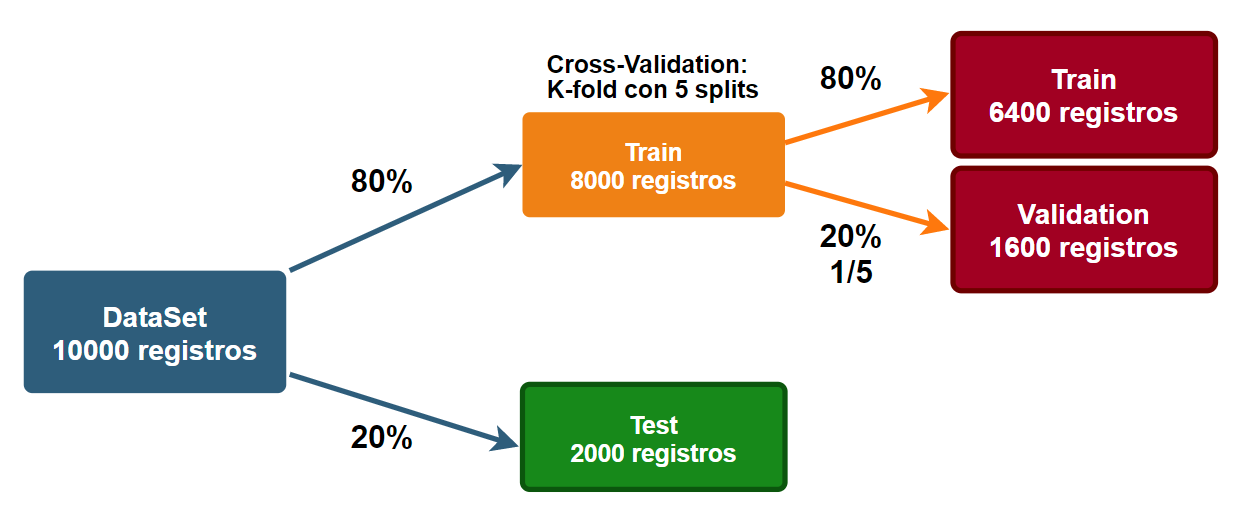

¿Recuerdas la anterior división no?
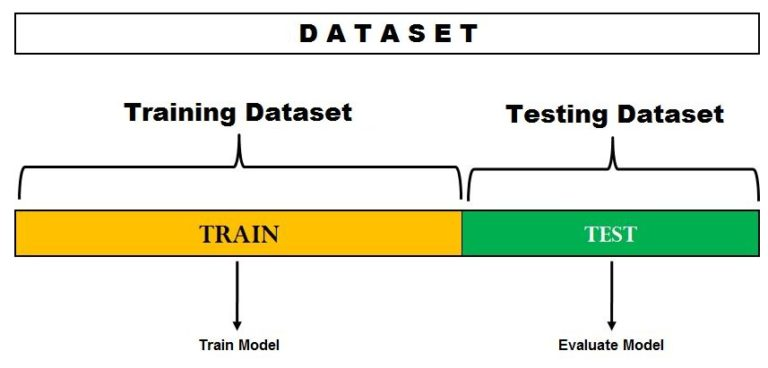

Pues ahora vamos a modificarla:
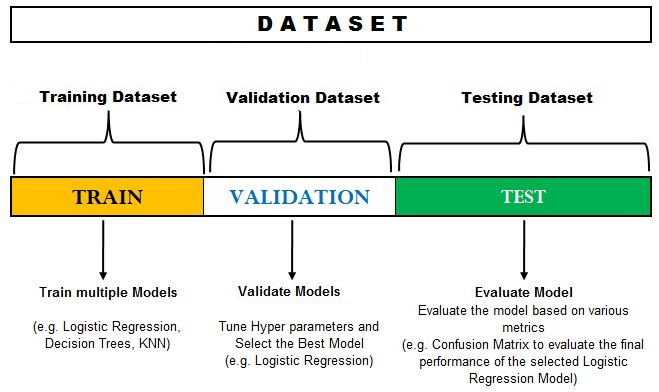

### Técnicas de Validación Cruzada (cross-validation)
Recuerda que seguimos teniendo 2 conjuntos de datos:
* __Conjunto de entrenamiento (train).__ 
* __Conjunto de pruebas (test).__

El de Test seguirá tratándose como antes: lo apartamos y lo usaremos al final, una vez entrenemos el modelo.

Dentro del conjunto de Train, y siguiendo nuestro ejemplo inicial, tenemos 8.000 registros. La validación más común utilizada y que nos sirve para entender el concepto es "K-folds" aunque tenemos otras como:
* Stratified K-Folds
* Leave P Out
* ShuffleSplit

Vamos a profundizar en __K-folds__ porque es la más común:

#### Cross-Validation: K-fold con 5 splits
Lo que hacemos normalmente al entrenar el modelo es pasarle los 8.000 registros y que haga el fit(). Con K-Folds (en este ejemplo de 5 splits) para entrenar, en vez de pasarle todos los registros directamente al modelo, haremos así:

* Iterar 5 veces:
    * Apartaremos 1/5 de muestras, es decir 1600.
    * Entrenamos al modelo con el restante 4/5 de muestras = 6400.
    * Mediremos el accuracy obtenido sobre las 1600 que habíamos apartado.
* Esto quiere decir que hacemos 5 entrenamientos independientes.
* El Accuracy final será el promedio de las 5 accuracies anteriores.

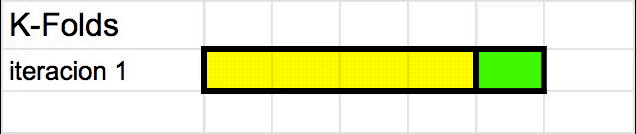

En amarillo las muestras para entrenar y en verde el conjunto de Validación.
Entonces fijémonos que estamos "ocultando" una quinta parte del conjunto de train durante cada iteración. Esto es similar a lo que explique antes, pero esta vez aplicado al momento de entrenamiento. Al cabo de esas 5 iteraciones, obtenemos 5 accuracies que deberían ser "similares" entre sí, esto sería un indicador de que el modelo está funcionando bien.

#### Ejemplo de K-Folds en Python donde vamos a realizar:
* Cargar el dataset
* Dividir en Train y Test (en 80/20)
* Creamos un modelo de Regresión Logística (podría ser otro) y lo entrenamos con los datos de Train
* Hacemos Cross-Validation usando K-folds con 5 splits
* Comparamos los resultados obtenidos en el modelo inicial, en el cross validation y vemos que son similares.
* Finalmente hacemos predict sobre el Conjunto de Test y veremos que también obtenemos buen Accuracy

In [9]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Cargamos un dataset de ejemplo que nos proporciona sciktlearn
iris = datasets.load_iris()
print("Dataset iris cargado. Número de registros: {}".format(len(iris['data'])))

# Dividimos en un 20% para test y 80% para train
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    test_size=0.2, 
                                                    random_state=50)
print("Hay {} registros en el set de train y {} registros en el set de test".format(
X_train.shape[0], X_test.shape[0]))

# Definimos el modelo, en este caso un modelo muy basico de regresión logisitca
# Y definimos el cross-validation con 5 iteraciones de K-Folds
kf = KFold(n_splits=5)
model = LogisticRegression(max_iter=200)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Comprobamos las metricas tras el entrenamiento
print("Train Accuracy: {:.3f}".format(model.score(X_train, y_train)))
print("Test Accuracy (pre-predicción): {:.3f}".format(model.score(X_test, y_test)))

# Proceso de cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

# Predecimos
preds = model.predict(X_test)
score_pred = metrics.accuracy_score(y_test, preds)
print("Test Accuracy (post-predicción): {:.3f}".format(score_pred))

Dataset iris cargado. Número de registros: 150
Hay 120 registros en el set de train y 30 registros en el set de test
Train Accuracy: 0.975
Test Accuracy (pre-predicción): 0.967
Metricas cross_validation [1.         1.         0.95833333 1.         0.91666667]
Media de cross_validation 0.975
Test Accuracy (post-predicción): 0.967
